## Testing the relative sizes of male and female penguins of a given species

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


We use a simplified version of the penguins dataset from [kaggle](https://www.kaggle.com/datasets/way2studytable/palmer-penguins-using-r).
We drop the rows with missing data. 

In [25]:
penguins = pd.read_csv('data/penguins_size.csv').dropna()
valid  = penguins['sex'].apply(lambda x: x in ['MALE','FEMALE'])
penguins = penguins[valid]
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


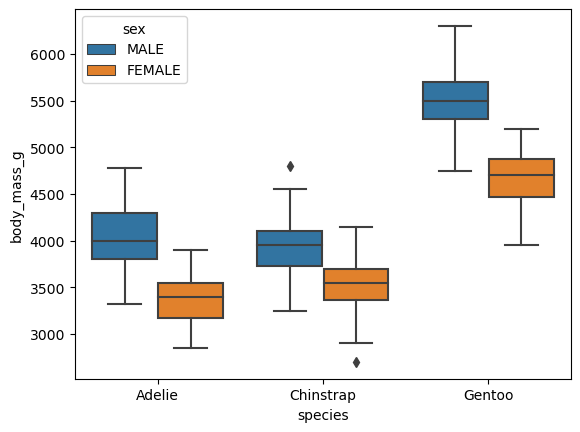

In [26]:
plot = sns.boxplot(data=penguins, x='species', y='body_mass_g',hue="sex")

In [27]:
Adelie = penguins[penguins['species']=='Adelie']

In [43]:
summary = Adelie.groupby('sex')['body_mass_g'].describe()
print(summary)
nFemale = summary.loc['FEMALE','count']
diff = summary['mean'].loc['FEMALE']- summary['mean'].loc['MALE']
print(f"Difference in observed means: {diff}")


        count         mean         std     min     25%     50%     75%     max
sex                                                                           
FEMALE   73.0  3368.835616  269.380102  2850.0  3175.0  3400.0  3550.0  3900.0
MALE     73.0  4043.493151  346.811553  3325.0  3800.0  4000.0  4300.0  4775.0
Difference in observed means: -674.6575342465753


In [29]:
shuffled_diffs=[]
for i in range(1000):
    shuffled = Adelie.sample(frac=1)
    shuffled_mean = shuffled.loc[:nFemale,'body_mass_g'].mean() - shuffled.loc[nFemale:,'body_mass_g'].mean()
    shuffled_diffs.append(shuffled_mean)
print(np.mean([diff < x for x in shuffled_diffs]))

1.0


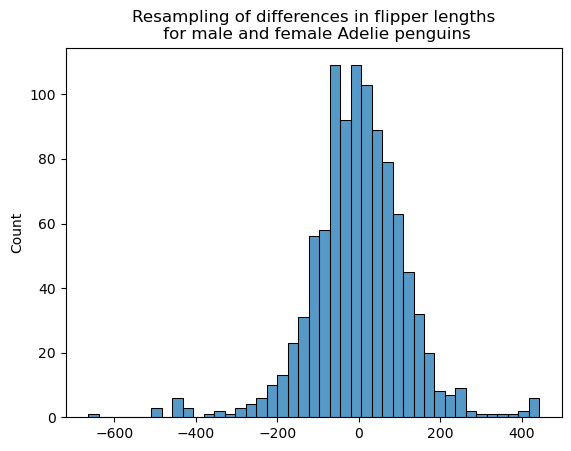

In [30]:
plot = sns.histplot(shuffled_diffs).set(title='Resampling of differences in flipper lengths\n for male and female Adelie penguins')

In [31]:
means=Adelie.groupby('sex')['body_mass_g'].mean()

In [32]:
from scipy.stats import ttest_ind

In [33]:
Adelie[Adelie['sex']=='MALE']['body_mass_g']

0      3750.0
5      3650.0
7      4675.0
13     3800.0
14     4400.0
        ...  
143    3725.0
145    3650.0
146    4250.0
149    3750.0
151    4000.0
Name: body_mass_g, Length: 73, dtype: float64

In [34]:
ttest_ind(Adelie[Adelie['sex']=='FEMALE']['body_mass_g'],Adelie[Adelie['sex']=='MALE']['body_mass_g'])

Ttest_indResult(statistic=-13.126285923485874, pvalue=2.2206436307866114e-26)

In [35]:
grouped = penguins.groupby(['species','sex'],as_index=False)['body_mass_g'].agg(['mean','count'])


In [36]:
grouped['key'] = grouped['species']+'-'+grouped['sex']

In [37]:
grouped

,species,sex,mean,count,key
0,Adelie,FEMALE,3368.835616,73,Adelie-FEMALE
1,Adelie,MALE,4043.493151,73,Adelie-MALE
2,Chinstrap,FEMALE,3527.205882,34,Chinstrap-FEMALE
3,Chinstrap,MALE,3938.970588,34,Chinstrap-MALE
4,Gentoo,FEMALE,4679.741379,58,Gentoo-FEMALE
5,Gentoo,MALE,5484.836066,61,Gentoo-MALE


In [38]:
penguins['key']=penguins['species']+'-'+penguins['sex']

In [39]:
obs_var = penguins.groupby('key')['body_mass_g'].mean().var()

In [40]:
vars=[]
for i in range(100):
    shuffled = penguins.copy()
    shuffled['body_mass_g'] = (shuffled['body_mass_g']).sample(frac=1,ignore_index=True)
    vars.append(shuffled.groupby('key')['body_mass_g'].mean().var())
np.mean([obs_var < x for x in vars])

0.0